In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import keras
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import Sequential

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

# Read the data from data set 

In [3]:
data = tf.keras.datasets.fashion_mnist

In [4]:
# train --> img , label 
# test --> img , label 

In [6]:
(train_img , train_label) , (test_img , test_label) = data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
train_label[0]

9

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
OHE = OneHotEncoder()

In [ ]:
بعمل كدا علشان اعمل علي train_label

In [21]:
train_labels = OHE.fit_transform (train_label.reshape(-1,1)).toarray()

In [23]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [24]:
test_labels = OHE.fit_transform (test_label.reshape(-1,1)).toarray()

In [25]:
test_labels[4]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [9]:
class_name = ["T-shirt/top"
,"Trouser"," Pullover"," Dress", "Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag"," Ankle boot"]

In [ ]:
Show the data , it's loop 25 , 

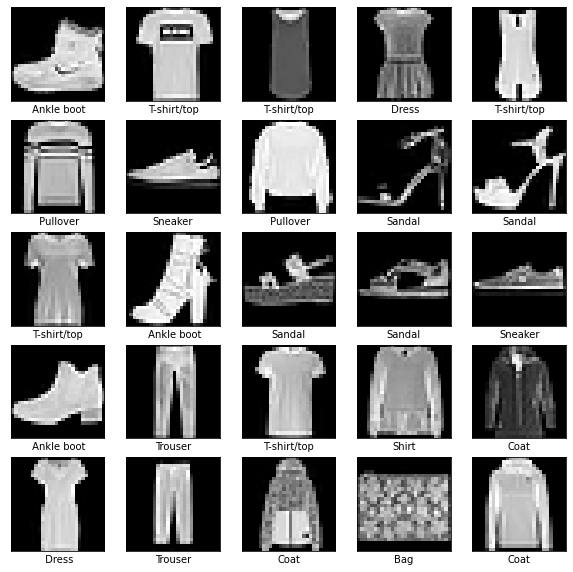

In [14]:
plt.figure(figsize=(10,10))

for i in range (25):
    plt.subplot(5,5,i+1)
    
    plt.xticks([])
    plt.yticks([])

    plt.imshow(train_img[i],cmap="gray")

    plt.xlabel(class_name[train_label[i]])
plt.show()

In [15]:
len (train_label),len(test_label)

(60000, 10000)

In [16]:
train_img[0].shape

(28, 28)

In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten()) # convert 2D to 1D
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))# output layer # 10 it's output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [30]:
history=model.fit(train_img,train_labels,validation_split=0.2,batch_size=40,epochs=5)

Epoch 1/5
1200/1200 [==============================] - 31s 26ms/step - loss: 0.3612 - accuracy: 0.8880 - val_loss: 0.4211 - val_accuracy: 0.8742
Epoch 2/5
1200/1200 [==============================] - 34s 29ms/step - loss: 0.3313 - accuracy: 0.8896 - val_loss: 0.3827 - val_accuracy: 0.8763
Epoch 3/5
1200/1200 [==============================] - 31s 26ms/step - loss: 0.3354 - accuracy: 0.8887 - val_loss: 0.4043 - val_accuracy: 0.8792
Epoch 4/5
1200/1200 [==============================] - 31s 26ms/step - loss: 0.3350 - accuracy: 0.8889 - val_loss: 0.4693 - val_accuracy: 0.8637
Epoch 5/5
1200/1200 [==============================] - 29s 24ms/step - loss: 0.3351 - accuracy: 0.8891 - val_loss: 0.6293 - val_accuracy: 0.8717


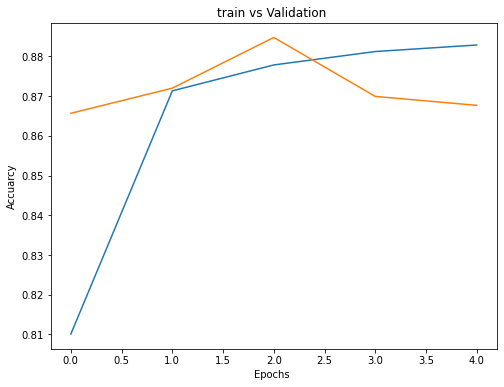

In [29]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("train vs Validation ")
plt.xlabel("Epochs ")
plt.ylabel("Accuarcy")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("train vs Validation ")
plt.xlabel("Epochs ")
plt.ylabel("Accuarcy")
plt.show()